# 2012年後

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_266019row_cleaned.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266019 entries, 0 to 266018
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  266019 non-null  object 
 1   土地位置建物門牌              266019 non-null  object 
 2   交易年月日                 266019 non-null  object 
 3   建築完成年月                231997 non-null  float64
 4   建物移轉總面積平方公尺           266019 non-null  float64
 5   有無管理組織                266019 non-null  object 
 6   總價元                   266019 non-null  int64  
 7   單價元平方公尺               266019 non-null  float64
 8   備註                    78495 non-null   object 
 9   編號                    266019 non-null  object 
 10  緯度                    266019 non-null  float64
 11  經度                    266019 non-null  float64
 12  bad_count             266019 non-null  float64
 13  good_count            266019 non-null  float64
 14  建築型態清整                266019 non-null  object 
 15  

# unitPrice outliers

In [4]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

鄉鎮市區                         0
土地位置建物門牌                     0
交易年月日                        0
建築完成年月                   34022
建物移轉總面積平方公尺                  0
有無管理組織                       0
總價元                          0
單價元平方公尺                      0
備註                      187524
編號                           0
緯度                           0
經度                           0
bad_count                    0
good_count                   0
建築型態清整                       0
陽台有無                         0
是否含額外土地                      0
建築型態_住商大樓                    0
建築型態_公寓                      0
建築型態_其他                      0
建築型態_透天厝                     0
房地總價元                        0
格局比例_房                       0
格局比例_廳                       0
格局比例_衛                       0
格局比例_隔間                      0
是否包含車位                       0
建材_磚石                        0
建材_鋼筋                        0
建材_鋼骨                        0
建材_竹木                        0
住                            0
商       

In [5]:
# 計算前 2.5% 和後 2.5% 的分位數值
lower_bound = df['單價元每坪'].quantile(0.025)
upper_bound = df['單價元每坪'].quantile(0.975)

# 篩選出前 2.5% 的資料
lower_2_5_percent = df[df['單價元每坪'] <= lower_bound]

# 篩選出後 2.5% 的資料
upper_2_5_percent = df[df['單價元每坪'] >= upper_bound]

# 顯示前後 2.5% 資料的數量
print(f"前 2.5% 的資料數量: {len(lower_2_5_percent)}")
print(f"後 2.5% 的資料數量: {len(upper_2_5_percent)}")

前 2.5% 的資料數量: 6652
後 2.5% 的資料數量: 6651


In [6]:
# 篩選出極端值
outliers_unitPrice = df[(df['單價元每坪'] < lower_bound) | (df['單價元每坪'] > upper_bound)]
# # 將 '房地總價元(坪)' 除以 10000，轉換成每坪萬元
# outliers_unitPrice['單價元每坪(萬)'] = outliers_unitPrice['單價元每坪'] / 10000
print(f"極端值數量: {len(outliers_unitPrice)}")

極端值數量: 13299


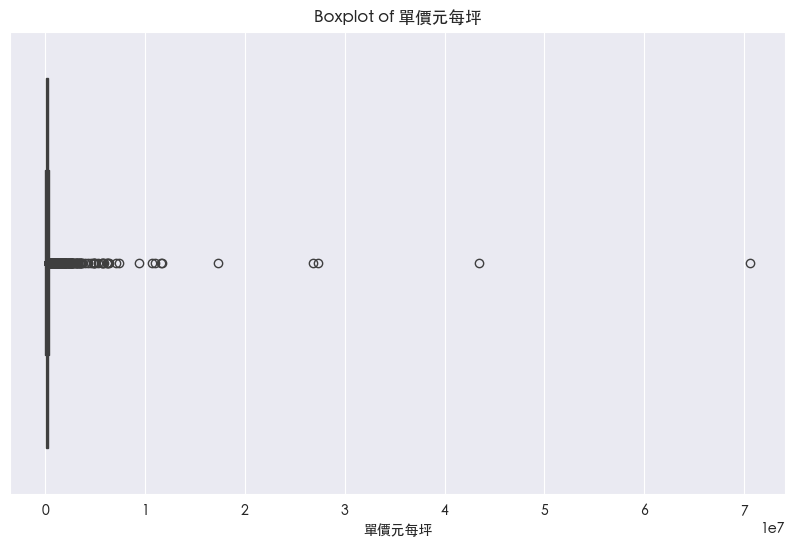

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['單價元每坪'])
plt.title('Boxplot of 單價元每坪')
plt.show()

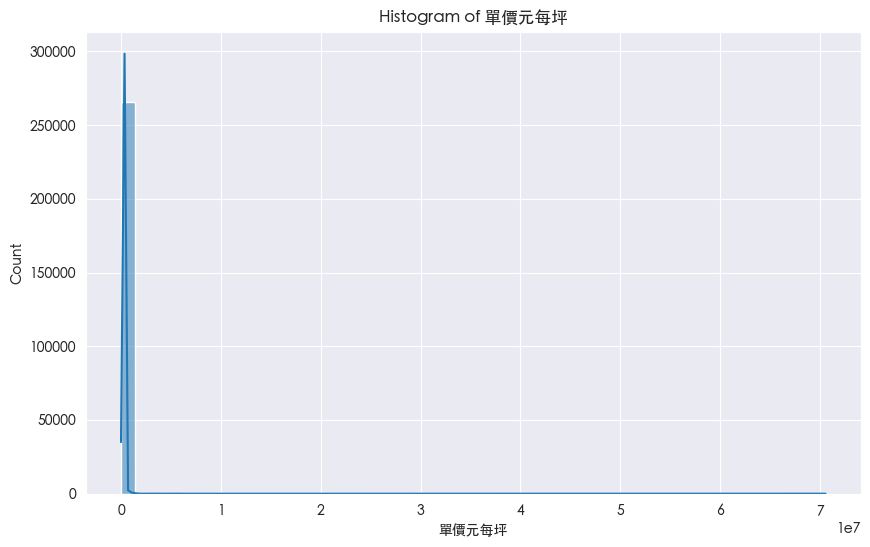

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(df['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪')
plt.show()

In [9]:
df_cleaned_unitPrice = df.drop(outliers_unitPrice.index)

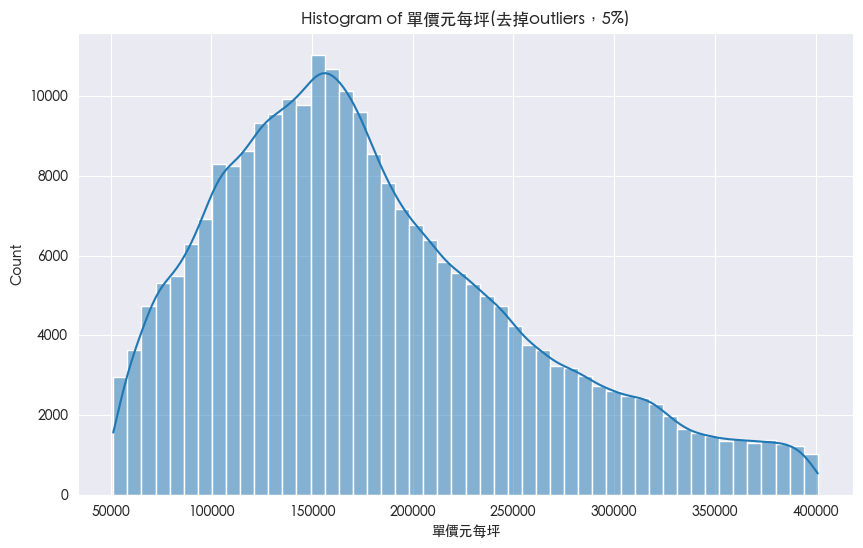

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_unitPrice['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪(去掉outliers，5%)')
plt.show()

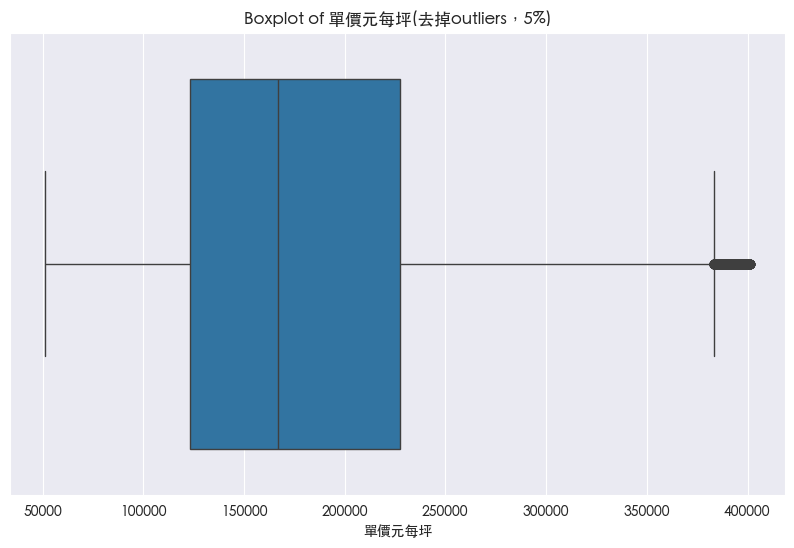

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned_unitPrice['單價元每坪'])
plt.title('Boxplot of 單價元每坪(去掉outliers，5%)')
plt.show()

In [12]:
df_cleaned_unitPrice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252720 entries, 0 to 266018
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  252720 non-null  object 
 1   土地位置建物門牌              252720 non-null  object 
 2   交易年月日                 252720 non-null  object 
 3   建築完成年月                222356 non-null  float64
 4   建物移轉總面積平方公尺           252720 non-null  float64
 5   有無管理組織                252720 non-null  object 
 6   總價元                   252720 non-null  int64  
 7   單價元平方公尺               252720 non-null  float64
 8   備註                    73809 non-null   object 
 9   編號                    252720 non-null  object 
 10  緯度                    252720 non-null  float64
 11  經度                    252720 non-null  float64
 12  bad_count             252720 non-null  float64
 13  good_count            252720 non-null  float64
 14  建築型態清整                252720 non-null  object 
 15  陽台有無 

In [13]:
df_cleaned_unitPrice.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_252720row_unitPrice_outlier_5percent_2024.csv',index=False)